# Objectives {.unnumbered}

By the end of this lab, you will:
1. Load and analyze the **Lightcast dataset** in **Spark DataFrame**.
2. Create **five easy and three medium-complexity visualizations** using **Plotly**.
3. Explore **salary distributions, employment trends, and job postings**.
4. Analyze **skills in relation to NAICS/SOC/ONET codes and salaries**.
5. Customize **colors, fonts, and styles** in all visualizations (**default themes result in a 2.5-point deduction**).
6. Follow **best practices for reporting on data communication**.

# Step 1: Load the Dataset {.unnumbered}


In [6]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png"
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import re



# Initialize Spark Session
spark = SparkSession.builder.appName("LightcastData").getOrCreate()

# Load Data
df = spark.read.option("header", "true").option("inferSchema", "true").option("multiLine","true").option("escape", "\"").csv("./data/lightcast_job_postings.csv")

# Show Schema and Sample Data
df.printSchema()
df.show(5)

root
 |-- ID: string (nullable = true)
 |-- LAST_UPDATED_DATE: string (nullable = true)
 |-- LAST_UPDATED_TIMESTAMP: timestamp (nullable = true)
 |-- DUPLICATES: integer (nullable = true)
 |-- POSTED: string (nullable = true)
 |-- EXPIRED: string (nullable = true)
 |-- DURATION: integer (nullable = true)
 |-- SOURCE_TYPES: string (nullable = true)
 |-- SOURCES: string (nullable = true)
 |-- URL: string (nullable = true)
 |-- ACTIVE_URLS: string (nullable = true)
 |-- ACTIVE_SOURCES_INFO: string (nullable = true)
 |-- TITLE_RAW: string (nullable = true)
 |-- BODY: string (nullable = true)
 |-- MODELED_EXPIRED: string (nullable = true)
 |-- MODELED_DURATION: integer (nullable = true)
 |-- COMPANY: integer (nullable = true)
 |-- COMPANY_NAME: string (nullable = true)
 |-- COMPANY_RAW: string (nullable = true)
 |-- COMPANY_IS_STAFFING: boolean (nullable = true)
 |-- EDUCATION_LEVELS: string (nullable = true)
 |-- EDUCATION_LEVELS_NAME: string (nullable = true)
 |-- MIN_EDULEVELS: integer (

# Salary Distribution by Employment Type
- Identify salary trends across different employment types.
- **Filter the dataset**
  - Remove records where **salary is missing or zero**.
- **Aggregate Data**
  - Group by **employment type** and compute salary distribution.
- **Visualize results**
  - Create a **box plot** where:
    - **X-axis** = `EMPLOYMENT_TYPE_NAME`
    - **Y-axis** = `SALARY_FROM`
  - Customize **colors, fonts, and styles** to avoid a **2.5-point deduction**.
- **Explanation:** Write two sentences about what the graph reveals.



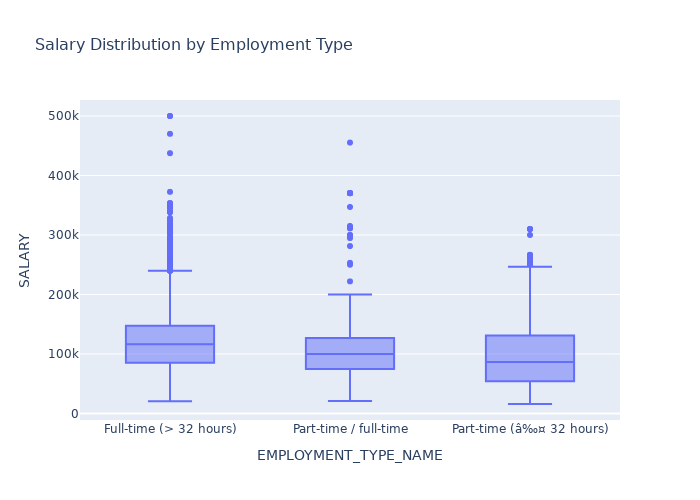

In [2]:
# Your Code for 1st question here
pdf = df.select("EMPLOYMENT_TYPE_NAME", "SALARY").toPandas()
fig = px.box(pdf, x="EMPLOYMENT_TYPE_NAME", y="SALARY", title="Salary Distribution by Employment Type", color_discrete_sequence=["#636EFA"])
fig.update_layout(font_family="Arial", title_font_size=16)
fig.show()

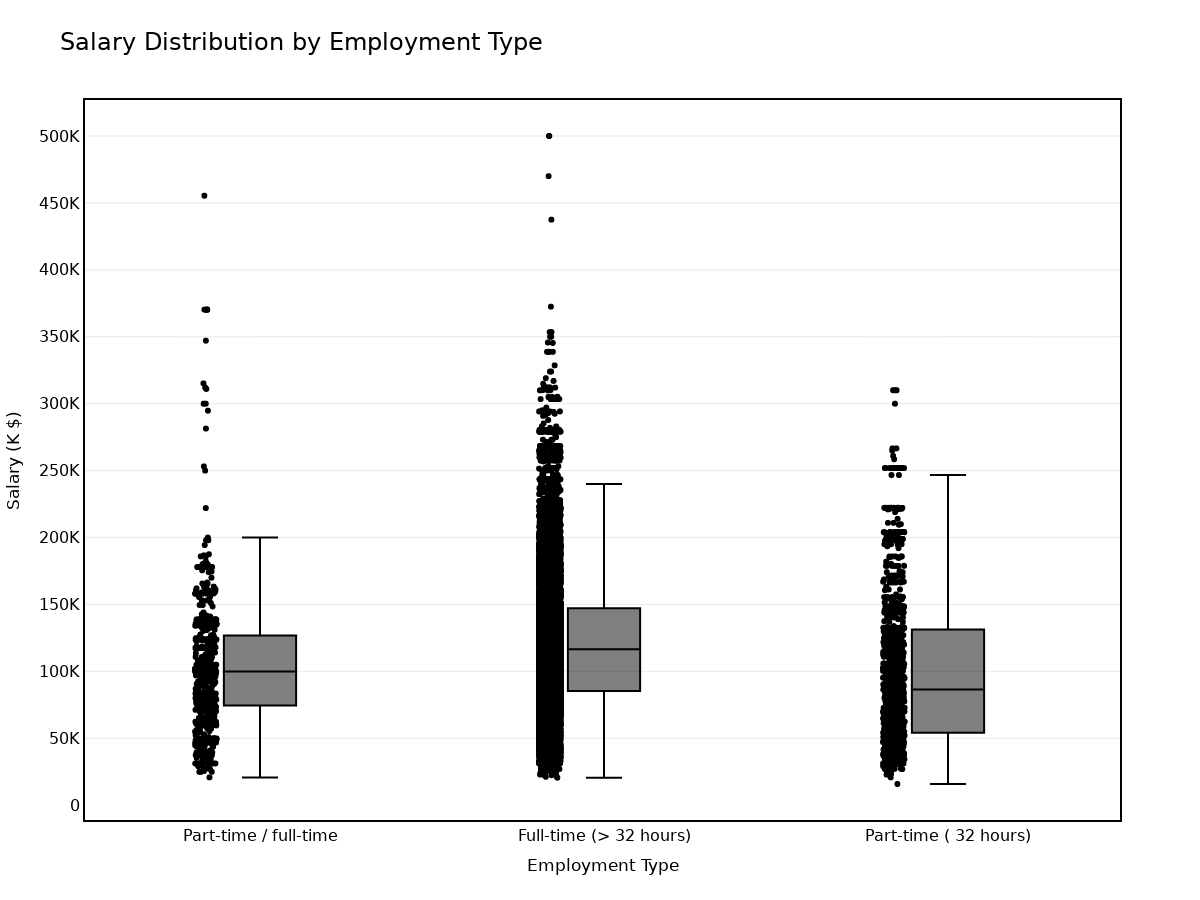

In [10]:
# Filter out missing or zero salary values
pdf = df.filter(df["SALARY"] > 0).select("EMPLOYMENT_TYPE_NAME", "SALARY").toPandas()

# Clean employment type names for better readability
pdf["EMPLOYMENT_TYPE_NAME"] = pdf["EMPLOYMENT_TYPE_NAME"].apply(lambda x: re.sub(r"[^\x00-\x7F]+", "", x))

# Create box plot with horizontal grid lines
fig = px.box(
    pdf, 
    x="EMPLOYMENT_TYPE_NAME", 
    y="SALARY", 
    title="Salary Distribution by Employment Type", 
    color_discrete_sequence=["black"],  # Single neutral color
    boxmode="group",
    points="all",  # Show all outliers
)

# Improve layout, font styles, and axis labels
fig.update_layout(
    title=dict(text="Salary Distribution by Employment Type", font=dict(size=24, family="Arial", color="black")),
    xaxis=dict(
        title="Employment Type",
        tickangle=0,  # Straight X-axis text
        tickfont=dict(size=16, family="Arial", color="black"),
        showline=True,  # Show axis lines
        linewidth=2,  # Thicker axis lines
        linecolor="black",
        mirror=True,
        showgrid=False  # Remove vertical grid lines
    ),
    yaxis=dict(
        title="Salary (K $)",  
        tickvals=[0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000],
        ticktext=["0", "50K", "100K", "150K", "200K", "250K", "300K", "350K", "400K", "450K", "500K"],
        tickfont=dict(size=16, family="Arial", color="black"),
        showline=True,  
        linewidth=2,  
        linecolor="black",
        mirror=True,  
        showgrid=True,  # Enable light horizontal grid lines
        gridcolor="lightgray",  # Light shade for the horizontal grid
        gridwidth=0.5  # Thin grid lines
    ),
    font=dict(family="Arial", size=14, color="black"),
    boxgap=0.7,  
    plot_bgcolor="white",
    paper_bgcolor="white",
    showlegend=False,  
    height=900,  
    width=1200,  
)

# Save as image for GitHub visibility
fig.write_image("salary_distribution.png")

# Show the figure
fig.show()

# Salary Distribution by Industry
- Compare salary variations across industries.
- **Filter the dataset**
  - Keep records where **salary is greater than zero**.
- **Aggregate Data**
  - Group by **NAICS industry codes**.
- **Visualize results**
  - Create a **box plot** where:
    - **X-axis** = `NAICS2_NAME`
    - **Y-axis** = `SALARY_FROM`
  - Customize colors, fonts, and styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [5]:
# Your code for 2nd question here

# Job Posting Trends Over Time
- Analyze how job postings fluctuate over time.
- **Aggregate Data**
  - Count job postings per **posted date (`POSTED`)**.
- **Visualize results**
  - Create a **line chart** where:
    - **X-axis** = `POSTED`
    - **Y-axis** = `Number of Job Postings`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [6]:
# Your code for 3rd question here

# Top 10 Job Titles by Count
- Identify the most frequently posted job titles.
- **Aggregate Data**
  - Count the occurrences of each **job title (`TITLE_NAME`)**.
  - Select the **top 10 most frequent titles**.
- **Visualize results**
  - Create a **bar chart** where:
    - **X-axis** = `TITLE_NAME`
    - **Y-axis** = `Job Count`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [7]:
# Your code for 4th question here

# Remote vs On-Site Job Postings
- Compare the proportion of remote and on-site job postings.
- **Aggregate Data**
  - Count job postings by **remote type (`REMOTE_TYPE_NAME`)**.
- **Visualize results**
  - Create a **pie chart** where:
    - **Labels** = `REMOTE_TYPE_NAME`
    - **Values** = `Job Count`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [8]:
# Your code for 5th question here

# Skill Demand Analysis by Industry (Stacked Bar Chart)
- Identify which skills are most in demand in various industries.
- **Aggregate Data**
  - Extract **skills** from job postings.
  - Count occurrences of skills grouped by **NAICS industry codes**.
- **Visualize results**
  - Create a **stacked bar chart** where:
    - **X-axis** = `Industry`
    - **Y-axis** = `Skill Count`
    - **Color** = `Skill`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [9]:
# Your code for 6th question here


# Salary Analysis by ONET Occupation Type (Bubble Chart)
- Analyze how salaries differ across ONET occupation types.
- **Aggregate Data**
  - Compute **median salary** for each occupation in the **ONET taxonomy**.
- **Visualize results**
  - Create a **bubble chart** where:
    - **X-axis** = `ONET_NAME`
    - **Y-axis** = `Median Salary`
    - **Size** = Number of job postings
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [10]:
# Your code for 7th question here

# Career Pathway Trends (Sankey Diagram)
- Visualize job transitions between different occupation levels.
- **Aggregate Data**
  - Identify career transitions between **SOC job classifications**.
- **Visualize results**
  - Create a **Sankey diagram** where:
    - **Source** = `SOC_2021_2_NAME`
    - **Target** = `SOC_2021_3_NAME`
    - **Value** = Number of transitions
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [11]:
# Your code for 8th question here